# PERIODI DI OSCILLAZIONE

variando la posizione di una massa vengono raccolti i periodi di oscillazione del pendolo, l'esperimento viene poi ripetuto ruotando il pendolo



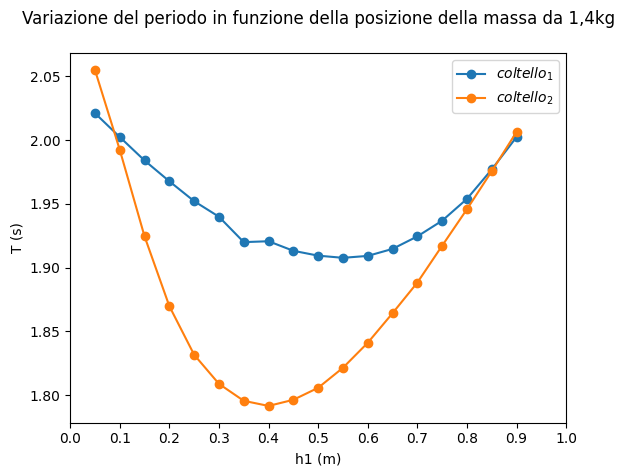

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'parabole.csv'
fr = pd.read_csv(FILE)

d = np.array(fr['d1(cm)']) * 0.01 # m

t1 = np.array(fr['t1']) # s
t2 = np.array(fr['t2']) # s

plt.title('Variazione del periodo in funzione della posizione della massa da 1,4kg\n')
plt.plot(d,t1,'o-',label="$coltello_1$")
plt.plot(d,t2,'o-',label='$coltello_2$')
plt.legend()
plt.xticks(np.linspace(0,1,11))
plt.ylabel('T (s)')
plt.xlabel('h1 (m)')
plt.show()